In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os


In [3]:
os.getcwd()

'/Users/shubhamgoyal/Downloads/Side projects/Facial-recognition-Image-classification'

In [4]:
img=cv2.imread('model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

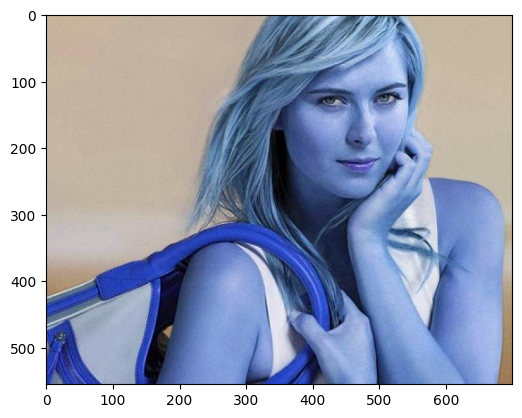

In [5]:
plt.imshow(img)

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

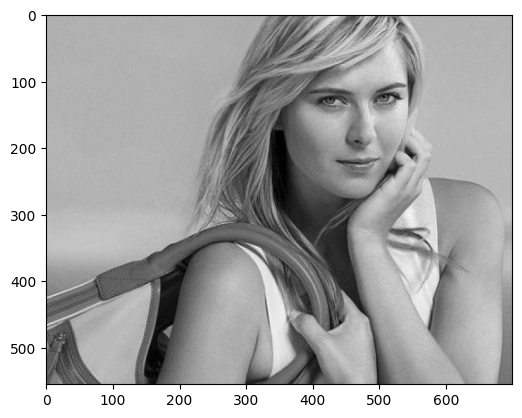

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
face_casscade=cv2.CascadeClassifier('model/opencv/haarcascade_frontalface_default.xml')
eye_casscade=cv2.CascadeClassifier('model/opencv/haarcascade_eye.xml')

faces=face_casscade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

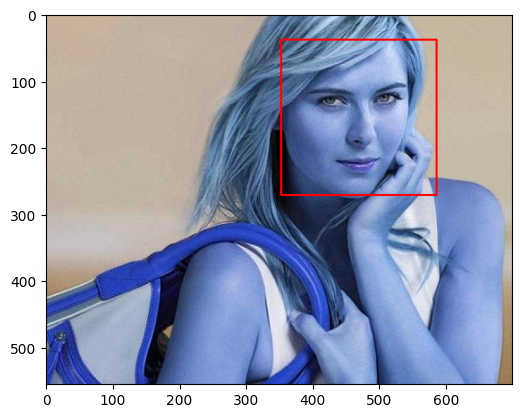

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

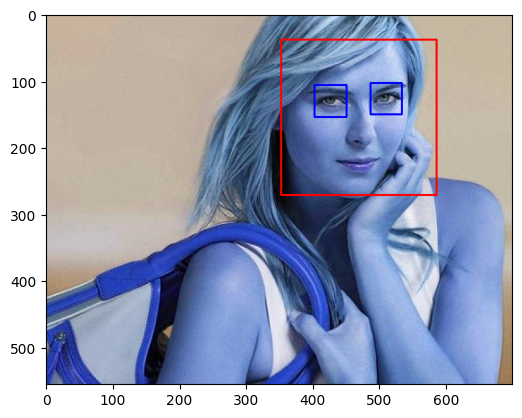

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_casscade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

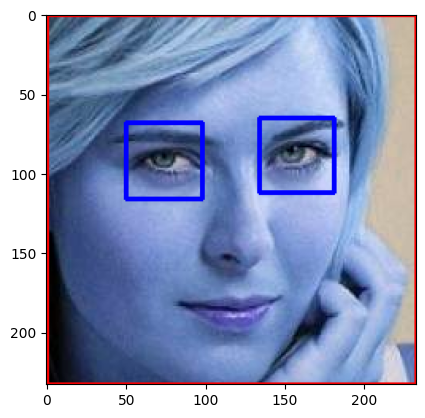

In [12]:
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_casscade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_casscade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

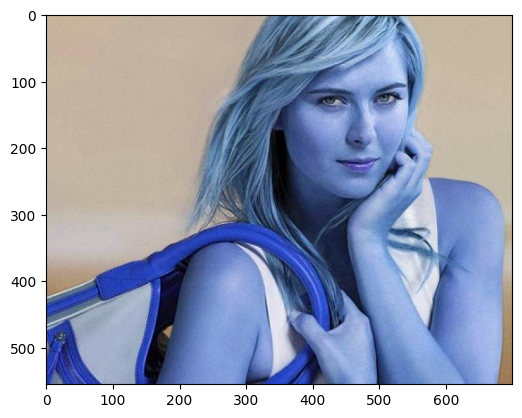

In [14]:
original_image=cv2.imread('model/test_images/sharapova1.jpg')
plt.imshow(original_image)

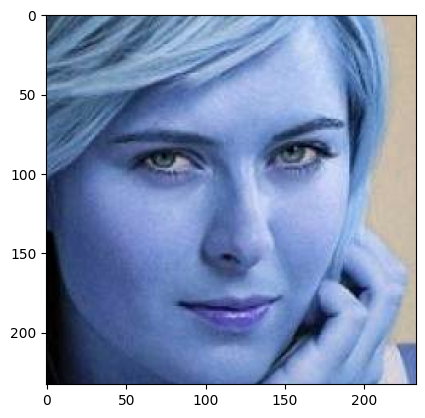

In [15]:
cropped_image=get_cropped_image_if_2_eyes('model/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data='model/dataset/'
path_to_cr_data='model/dataset/cropped/'

In [21]:
img_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['model/dataset/Robert Downey Jr',
 'model/dataset/Brad Pitt',
 'model/dataset/Leonardo DiCaprio',
 'model/dataset/Jennifer Lawrence',
 'model/dataset/Tom Cruise',
 'model/dataset/Hugh Jackman',
 'model/dataset/Angelina Jolie',
 'model/dataset/Johnny Depp',
 'model/dataset/Tom Hanks',
 'model/dataset/Denzel Washington',
 'model/dataset/Kate Winslet',
 'model/dataset/Scarlett Johansson',
 'model/dataset/Will Smith',
 'model/dataset/Natalie Portman',
 'model/dataset/Nicole Kidman',
 'model/dataset/Sandra Bullock',
 'model/dataset/Megan Fox']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count =1 
    celebrity_name=img_dir.split('/')[-1]
    celebrity_name_no_space=celebrity_name.replace(" ","_")
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name_no_space]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name_no_space
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name=celebrity_name_no_space+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            print(cropped_file_path)
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name_no_space].append(cropped_file_path)
            count+=1

Robert Downey Jr
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr1.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr2.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr3.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr4.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr5.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr6.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr7.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr8.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr9.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr10.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr11.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr12.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr13.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr14.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr15.png
model/dataset/cropped/Robert_Downey_Jr/Robert_Downey_Jr16.png


In [26]:
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

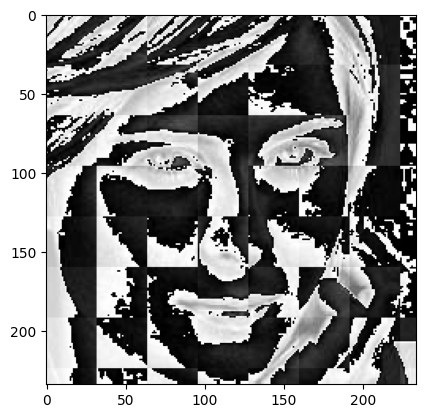

In [27]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [44]:
class_dict={}
count=0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
    
class_dict

{'Robert_Downey_Jr': 0,
 'Brad_Pitt': 1,
 'Leonardo_DiCaprio': 2,
 'Jennifer_Lawrence': 3,
 'Tom_Cruise': 4,
 'Hugh_Jackman': 5,
 'Angelina_Jolie': 6,
 'Johnny_Depp': 7,
 'Tom_Hanks': 8,
 'Denzel_Washington': 9,
 'Kate_Winslet': 10,
 'Scarlett_Johansson': 11,
 'Will_Smith': 12,
 'Natalie_Portman': 13,
 'Nicole_Kidman': 14,
 'Sandra_Bullock': 15,
 'Megan_Fox': 16}

In [45]:
X,y=[],[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scaled_raw_img=cv2.resize(img,(32,32))
        imh_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(im_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrity_name)
    

In [46]:
X[0]

array([[ 27],
       [ 26],
       [ 36],
       ...,
       [ 45],
       [ 35],
       [238]], dtype=uint8)

In [47]:
 len(X[0])

4096

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1376, 4096)

In [49]:
X[0]

array([ 27.,  26.,  36., ...,  45.,  35., 238.])